![Instacart](https://raw.githubusercontent.com/interviewquery/takehomes/instacart_1/instacart_1/logo.png)
# Data Analyst Challenge

## Directions

We'd love for you to analyze the data in `data.csv` and share what you find. We know
that you don't know much about how our team currently is run, but that's
okay. This data set includes information on orders, order location,
customer ratings, and any issues reported by the customer for a set of
orders.

1. Please analyze the data in the adjacent tab and share with us the

    1. any observations about our business.

    1. How would you staff the Customer Support Team?

Please compile your analysis into a document or deck to convey your
findings. Use the Data Set as necessary to substantiate your claims.


In [1]:
!git clone --branch instacart_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/instacart_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1768, done.
remote: Counting objects: 100% (576/576), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 1768 (delta 169), reused 481 (delta 120), pack-reused 1192
Receiving objects: 100% (1768/1768), 297.30 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (619/619), done.
/content/takehomes/instacart_1
data.csv  logo.png  metadata.json  takehomefile.ipynb


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes(palette='deep')

In [3]:
#read data
df = pd.read_csv('data.csv', index_col = 'order id')
df.head()

,order delivery time,customer order rating,type of issue reported,region
order id,,,,
233599337,2014-06-02 04:23:16 UTC,5,NaN,chi
233599376,2014-06-02 03:57:50 UTC,5,NaN,chi
233599328,2014-06-02 02:52:38 UTC,5,NaN,chi
233599070,2014-06-02 02:52:04 UTC,5,NaN,chi
233599100,2014-06-02 02:41:43 UTC,5,NaN,chi


In [4]:
df.shape

(14957, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14957 entries, 233599337 to 233614681
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   order delivery time     14957 non-null  object
 1   customer order rating   14957 non-null  int64 
 2   type of issue reported  1087 non-null   object
 3   region                  14957 non-null  object
dtypes: int64(1), object(3)
memory usage: 584.3+ KB


In [6]:
df.isnull().sum()/df.shape[0]*100

order delivery time        0.0000
customer order rating      0.0000
type of issue reported    92.7325
region                     0.0000
dtype: float64

We see that 92.7% of data in column 'type of issue reported' we must examine it

In [7]:
df['type of issue reported'].unique()

array([nan, 'Wrong item', 'Item charged incorrectly',
       'Damaged or spoiled', 'Item missing', 'Other Order Issue',
       'Poor service', 'Poor replacement'], dtype=object)

we see that when the order has not any problem it has nan. So we must replace nan value with 'No issue'

In [8]:
df.fillna('No issue', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14957 entries, 233599337 to 233614681
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   order delivery time     14957 non-null  object
 1   customer order rating   14957 non-null  int64 
 2   type of issue reported  14957 non-null  object
 3   region                  14957 non-null  object
dtypes: int64(1), object(3)
memory usage: 584.3+ KB


Now we don't have nan values

In [10]:
# Convert order delivery time tp datetime
df['order delivery time'] = pd.to_datetime(df['order delivery time'])

In [11]:
# Split datetime to year month day hour
df['year'] = df['order delivery time'].dt.year
df['month'] = df['order delivery time'].dt.month
df['day'] = df['order delivery time'].dt.day
df['day of week'] = df['order delivery time'].dt.dayofweek
df['hour'] = df['order delivery time'].dt.hour

In [12]:
df.head()

,order delivery time,customer order rating,type of issue reported,region,year,month,day,day of week,hour
order id,,,,,,,,,
233599337,2014-06-02 04:23:16+00:00,5,No issue,chi,2014,6,2,0,4
233599376,2014-06-02 03:57:50+00:00,5,No issue,chi,2014,6,2,0,3
233599328,2014-06-02 02:52:38+00:00,5,No issue,chi,2014,6,2,0,2
233599070,2014-06-02 02:52:04+00:00,5,No issue,chi,2014,6,2,0,2
233599100,2014-06-02 02:41:43+00:00,5,No issue,chi,2014,6,2,0,2


In [13]:
df['day of week'] = df['day of week'].replace({0:'Monday', 1: 'Tuesday', 2: 'Wednesday', 3:'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [14]:
# convert customer order rating to category
df['customer order rating'] = df['customer order rating'].astype('category')

In [15]:
df['month'].unique()

array([6, 5])

In [16]:
df['year'].unique()

array([2014])

We see that our data contain sales for the year 2014 and for months May and June

In [17]:
df['region'].unique()

array(['chi', 'nyc', 'sf', 'sf '], dtype=object)

In [18]:
# Clean region column drop space from sf
df['region'] = df['region'].str.replace(' ', '')

In [19]:
# rename region values
df['region'] = df['region'].replace({'chi': 'Chicago', 'nyc': 'New York', 'sf': 'San Francisco'})

In [20]:
#we can drop year column beacause we have only year 2014
df.drop('year', axis=1, inplace = True)

In [21]:
#Number of days per month
df[df['month']==6]['day'].nunique()

2

For our Data Analysis we will use data from May because we have only two days in June 

In [22]:
df_eda = df[df['month'] == 5].drop('order delivery time',axis=1)

In [23]:
orders_per_region = df_eda.groupby('region')['hour'].count().reset_index()

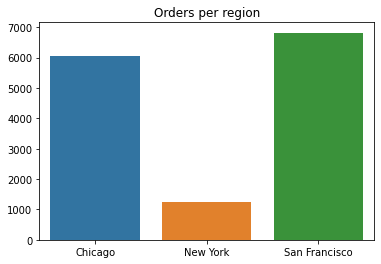

In [24]:
sns.barplot(data = orders_per_region, x = 'region', y='hour')
plt.xlabel('')
plt.ylabel('')
plt.title('Orders per region')
plt.show()

This bar plot shows the number  of orders that took place in May 2014.  It is quite obvious that the Instacart had 6000 orders in Chicago and almost 7000 in San Francisco which was the place where Instacart was originally established and the first market started to operate. Another point worth mentioning is that In New York they had only approximately 1500 orders; that’s mainly because it has been only two months since they started to provide their services in this specific area. So, we expect that the orders in New York will gradually increase and will reach the percentage of other cities.


In [25]:
orders_per_days_on_month = df_eda.groupby('day')['hour'].count().reset_index()

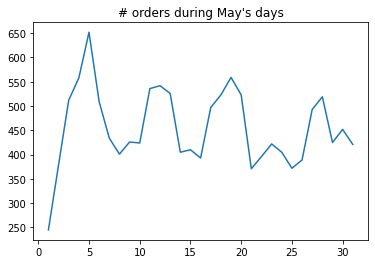

In [26]:
sns.lineplot(data = orders_per_days_on_month, x='day', y='hour')
plt.title('# orders during May\'s days')
plt.xlabel('')
plt.ylabel('')
plt.show()

In the second line graph we see the number of orders during the month. As we observe there are some peaks which mean that there are days that the orders increased. Maybe it is Saturday the day that most people used to do their shopping.  We will analyze this in the next graph.


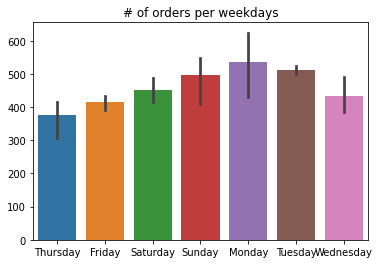

In [27]:
orders_per_weekdays = df_eda.groupby(['day','day of week'])['hour'].count().reset_index()
sns.barplot(data = orders_per_weekdays, y='hour', x='day of week')
plt.title('# of orders per weekdays')
plt.xlabel('')
plt.ylabel('')
plt.show()

The days with the most orders were Sunday, Monday and Tuesday and less orders be made on Thursday. It’s unusual that Monday was the day with the most orders, maybe this happens because people pass more time at home on weekends and consume more products which they usually should rebuy on Monday. 

<Axes: xlabel='hour', ylabel='day'>

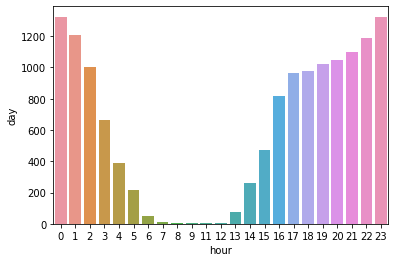

In [28]:
orders_per_hour = df_eda.groupby('hour')['day'].count().reset_index()
sns.barplot(data = orders_per_hour, x = 'hour', y = 'day')

The we will analyze the hours that customers prefer to make their orders. As we the most orders become between 20:00 and 01:00 where most of people are in home with the peak at 23:00 to 00:00. This is because according to researches the most online orders made when people lay on bed and pass time on mobile before they sleep. 

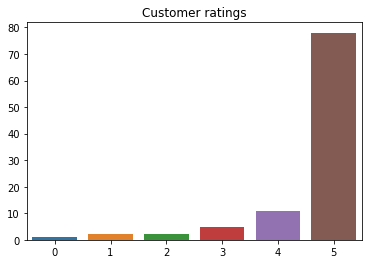

In [29]:
ratings = df_eda.groupby('customer order rating')['hour'].count().reset_index()
ratings['percent'] = round(ratings['hour']/ratings['hour'].sum()*100,0)
sns.barplot(data = ratings, x='customer order rating', y='percent')
plt.title('Customer ratings')
plt.xlabel('')
plt.ylabel('')
plt.show()

Most of the customers are satisfied with the Instacart, about 78% rate with 5 stars. Lets then examine the reasons that lead the customers to rate the company lower.

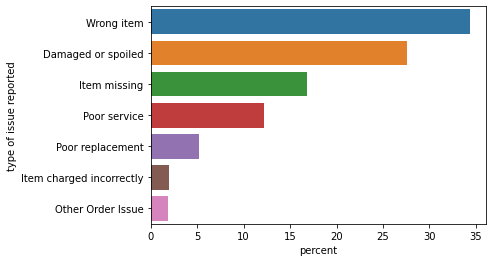

In [30]:
#Lets examine the reasons of bad rating
problems_with_orders = df_eda[df_eda['type of issue reported'] != 'No issue'].groupby('type of issue reported')['hour'].count().reset_index().sort_values('hour', ascending=False)
problems_with_orders['percent'] = problems_with_orders['hour'] / problems_with_orders['hour'].sum()*100
sns.barplot(data = problems_with_orders, y='type of issue reported', x= 'percent')
plt.show()

We observe the reason of lower rate. The main reason is that customer recieve whorg items or items in bad condition.About 35% of disappointed customers receives wrong items and 28% damaged products.
if employees become more carefull with orders, the customer's complaints will be decreased  

In [38]:
#days with most issues
issue_per_day = df_eda.groupby(['day of week', 'type of issue reported'])['hour'].count().reset_index().sort_values('hour', ascending=False)

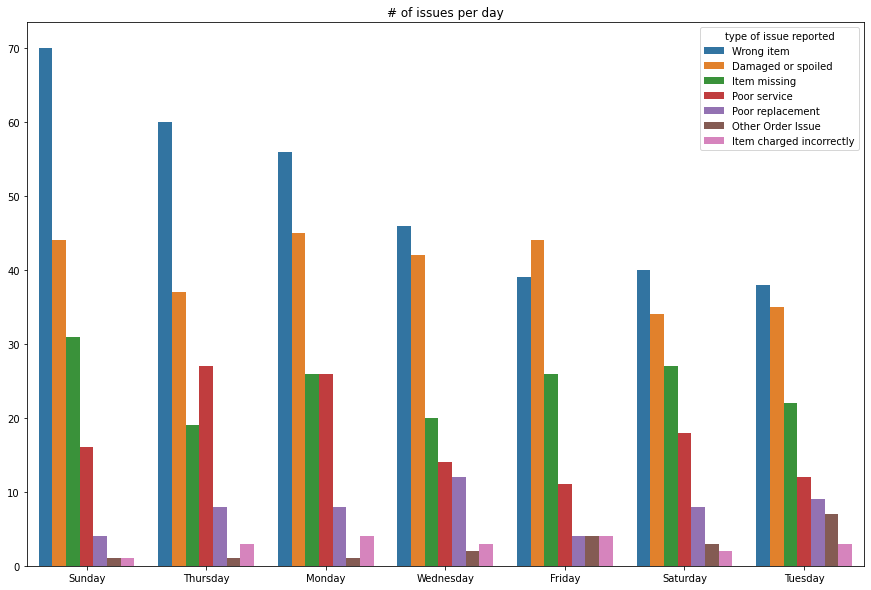

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(data = issue_per_day[issue_per_day['type of issue reported'] != 'No issue'], x='day of week', y='hour', hue = 'type of issue reported')
plt.xlabel('')
plt.ylabel('')
plt.title('# of issues per day')
plt.show()

We notice that Sunday and Monday, which are the days with the most orders, have the most complaints, but we also see that Thursday has many complaints even though it has the fewest orders.